In [1]:
## import necessary module
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
dim  = 3    # system dimension (x,y,z)
nump = 1000 # number of independent Brownian particles to simulate 
nums = 1024 # number of simulation steps
dt   = 0.05 # set time increment, \Delta t
zeta = 1.0  # set friction constant, \zeta
m    = 1.0  # set particle mass, m
kBT  = 1.0  # set temperatute, k_B T
F0   = 1.0  # set external drift force
std  = np.sqrt(2*kBT*zeta*dt) # calculate std for \Delta W 
np.random.seed(0) # initialize random number generator with a seed=0
R = np.zeros([nump,dim]) # array to store current positions and set initial condition 
V = np.zeros([nump,dim]) # array to store current velocities and set initial condition 
W = np.zeros([nump,dim]) # array to store current random forcces
F = np.zeros([nump,dim]) # array to store external force
Rs = np.zeros([nums,nump,dim]) # array to store positions at all steps
Vs = np.zeros([nums,nump,dim]) # array to store velocities at all steps
Ws = np.zeros([nums,nump,dim]) # array to store random forces at all steps
time  = np.zeros([nums]) # an array to store time at all steps
F[:,0]=F0 # constant force along x, zero force in y and z
for i in range(nums): # repeat the following operations from i=0 to nums-1
    W = std*np.random.randn(nump,dim) # generate an array of random forces accordingly 
    R, V = R + V*dt, V*(1-zeta/m*dt)+W/m+F/m*dt # update R & V 
    Rs[i]=R # accumulate particle positions at each step in an array Rs
    Vs[i]=V # accumulate particle velocitys at each step in an array Vs
    Ws[i]=W # accumulate random forces at each step in an array Ws
    time[i]=i*dt # store time in each step in an array time
Vsa = np.average(Vs,axis=1) # average over particles (0-axis is time, 1-axis is particles, 2-axis is dimension)
Vx  = np.average(Vsa[:,0]) # time average of (particle averaged) x-velocity
print('D =',kBT/zeta, '(Theoretical)')
print('D =',Vx*kBT/F0,'(Simulation with external force)')

D = 1.0 (Theoretical)
D = 0.980302218583486 (Simulation with external force)


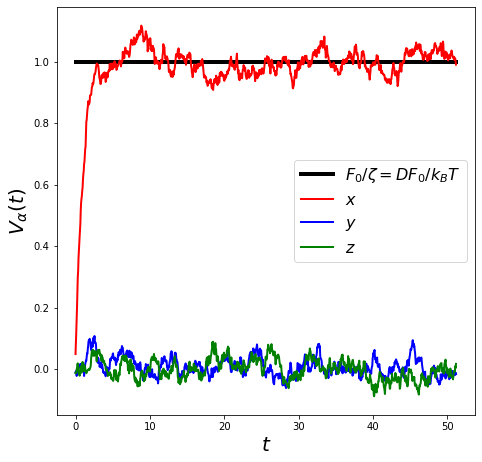

In [3]:
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_ylabel(r"$V_{\alpha}(t)$", fontsize=20)
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(time,F0/zeta*np.ones(nums),'k',lw=4,label=r"$F_0/\zeta=DF_0/k_B T$")
ax.plot(time,Vsa[:,0],'r',lw=2,label="$x$")
ax.plot(time,Vsa[:,1],'b',lw=2,label="$y$")
ax.plot(time,Vsa[:,2],'g',lw=2,label="$z$")
ax.legend(fontsize=16,loc=5)
plt.show()

D = 1.0 (Theoretical)
D = 6.253101005730915 (Simulation via MSD)


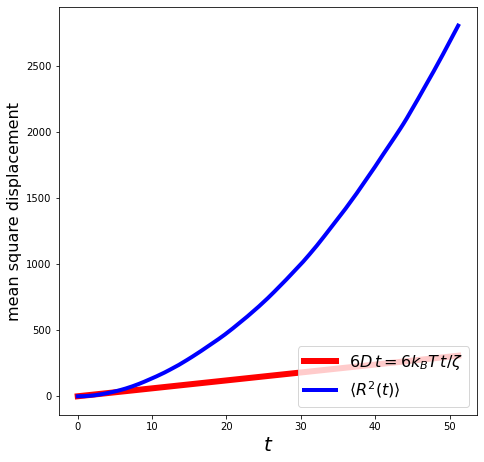

In [4]:
# mean square displacement vs time
msd = np.zeros([nums])
for i in range(nums): # loop over time steps
    for n in range(nump): # loop over particles
        msd[i]=msd[i]+np.linalg.norm(Rs[i,n,:])**2 # (R(t) - R(0))^2 = R(t)^2, since R(0) = 0 for all particles
    msd[i] = msd[i]/nump  # average over particles
dmsd = np.trapz(msd, dx=dt)/ (3*(nums*dt)**2) # integrate using trapezoidal rule
print('D =',kBT/zeta,'(Theoretical)')
print('D =',dmsd,'(Simulation via MSD)')
fig, ax = plt.subplots(figsize=(7.5,7.5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.set_ylabel(r"mean square displacement", fontsize=16)
ax.plot(time,6*kBT/zeta*time,'r',lw=6, label=r'$6D\,t={6k_BT \,t}/{\zeta}$')
ax.plot(time,msd,'b',lw=4, label=r'$\langle R^2(t)\rangle$')
ax.legend(fontsize=16,loc=4)
plt.show()
